# End-to-End Machine Learning Project

## Agenda:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

---

Working with Real Data

* Popular open data repositories
    * [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
    * [Kaggle datasets](https://www.kaggle.com/datasets)
    * [Amazon’s AWS datasets](https://registry.opendata.aws/)
* Meta portals (they list open data repositories)
    * [Data Portals](http://dataportals.org/)
    * [OpenDataMonitor](http://opendatamonitor.eu/)
    * [Quandl](http://quandl.com/)
* Other pages listing many popular open data repositories
    * [Wikipedia’s list of Machine Learning datasets](https://homl.info/9)
    * [Quora.com](https://homl.info/10)
    * [The datasets subreddit](https://www.reddit.com/r/datasets)
    
In this chapter we’ll use the California Housing Prices dataset from the StatLib repository2 (see Figure 2-1). This dataset is based on data from the 1990 California census. It is not exactly recent (a nice house in the Bay Area was still affordable at the time), but it has many qualities for learning, so we will pretend it is recent data. For teaching purposes I’ve added a categorical attribute and removed a few features.

![01](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0201.png)

## Look at the Big Picture

Este módulo é o Machine Learning Housing Corporation. O objetivo é usar os dados do `California census`. Esses dados incluem métricas como população, renda mediana e preço médio da moradia para cada grupo de blocos na Califórnia. Grupos de blocos são a menor unidade geográfica para a qual o US Census Bureau publica dados de amostra (um grupo de blocos normalmente tem uma população de 600 a 3.000 pessoas). Vamos chamá-los de "districts" para abreviar.

## Frame the Problem

A primeira pergunta a ser feita ao seu chefe é qual é exatamente o objetivo do negócio. Construir um modelo provavelmente não é o objetivo final. Como a empresa espera usar e se beneficiar desse modelo? Conhecer o objetivo é importante porque ele determinará como você enquadra o problema, quais algoritmos você selecionará, qual medida de desempenho você usará para avaliar seu modelo e quanto esforço você gastará em ajustá-lo.

O seu chefe responde que a produção do seu modelo (uma previsão do preço médio da moradia de um distrito) será fornecida a outro sistema de aprendizado de máquina (veja a Figura 2-2), juntamente com muitos outros sinais.3 Esse sistema a jusante determinará se vale a pena investir em uma determinada área ou não. Conseguir isso certo é fundamental, pois afeta diretamente a receita.

![02](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0202.png)

### PIPELINES

Uma sequência de componentes de processamento de dados é chamada de pipeline de dados. Os pipelines são muito comuns nos sistemas de Machine Learning, pois há muitos dados para manipular e muitas transformações para aplicar.

Os componentes geralmente são executados de forma assíncrona. Cada componente extrai uma grande quantidade de dados, os processa e cospe o resultado em outro armazenamento de dados. Então, algum tempo depois, o próximo componente no pipeline extrai esses dados e cospe sua própria saída. Cada componente é bastante independente: a interface entre os componentes é simplesmente o armazenamento de dados. Isso simplifica a compreensão do sistema (com a ajuda de um gráfico de fluxo de dados) e equipes diferentes podem se concentrar em diferentes componentes. Além disso, se um componente quebra, os componentes downstream geralmente podem continuar funcionando normalmente (pelo menos por um tempo) usando apenas a última saída do componente quebrado. Isso torna a arquitetura bastante robusta.

Por outro lado, um componente quebrado pode passar despercebido por algum tempo se o monitoramento adequado não for implementado. Os dados ficam obsoletos e o desempenho geral do sistema cai.

---

A próxima pergunta a ser feita ao seu chefe é a aparência da solução atual (se houver). A situação atual geralmente fornece uma referência para o desempenho, bem como informações sobre como resolver o problema. Seu chefe responde que os preços da habitação no distrito são atualmente estimados manualmente por especialistas: uma equipe reúne informações atualizadas sobre um distrito e, quando não podem obter o preço médio da habitação, estimam isso usando regras complexas.

Isso é caro e demorado, e suas estimativas não são ótimas; nos casos em que conseguem descobrir o preço médio real da moradia, geralmente percebem que suas estimativas foram superiores a 20%. É por isso que a empresa pensa que seria útil treinar um modelo para prever o preço médio da habitação de um distrito, dados outros dados sobre esse distrito. Os dados do censo parecem um ótimo conjunto de dados a serem explorados para esse fim, uma vez que incluem os preços médios de moradias de milhares de distritos, além de outros dados.

Com todas essas informações, você está pronto para começar a projetar seu sistema. Primeiro, você precisa enquadrar o problema: é supervisionado, não supervisionado ou Aprendizado por Reforço? É uma tarefa de classificação, uma tarefa de regressão ou outra coisa? Você deve usar técnicas de aprendizado em lote ou online? Antes de continuar lendo, faça uma pausa e tente responder a essas perguntas por si mesmo.

Você encontrou as respostas? Vamos ver: é claramente uma tarefa típica de aprendizado supervisionado, já que você recebe exemplos de treinamento rotulados (cada instância vem com a produção esperada, ou seja, o preço médio da moradia no distrito). Também é uma tarefa de regressão típica, pois você é solicitado a prever um valor. Mais especificamente, esse é um problema de regressão múltipla, uma vez que o sistema usará vários recursos para fazer uma previsão (usará a população do distrito, a renda mediana etc.). Também é um problema de regressão univariado, pois estamos apenas tentando prever um valor único para cada distrito. Se tentássemos prever vários valores por distrito, seria um problema de regressão multivariada. Finalmente, não há fluxo contínuo de dados entrando no sistema, não há necessidade específica de se ajustar rapidamente aos dados alterados, e os dados são pequenos o suficiente para caber na memória, portanto, o aprendizado em lote simples deve funcionar perfeitamente.

## Select a Performance Measure

Your next step is to select a performance measure. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors. Equation 2-1 shows the mathematical formula to compute the RMSE.

Seu próximo passo é selecionar uma medida de desempenho (performance measure). Uma medida de desempenho típica para problemas de regressão é o erro médio quadrático (Root Mean Square Error - RMSE). Ele dá uma idéia de quanto erro o sistema geralmente faz em suas previsões, com um peso maior para erros grandes. A equação 2-1 mostra a fórmula matemática para calcular o RMSE.

$$ RMSE\left( X, h\right) =\sqrt {\dfrac {1}{m}\sum ^{m}_{i=1}\left( h\left( x^{\left( i\right) }\right) - y^{\left( i\right) }\right) ^{2}} $$

* $m$ é o número de instâncias no dataset em que você está medindo o RMSE.
* $ x^{\left( i\right) }$ é um vetor com todos os valores de um determinado recurso, excluíndo o rótulo.
* $ y^{\left( i\right) }$ é o rótudo, ou seja, o valor de saída desejado.

Por exemplo, se o primeiro distrito do dataset estiver localizado na longitude **–118,29°**, latitude **33,91°**, tiver **1.416** habitantes com uma renda mediana de **\\$38.372** e o valor médio da casa for **\\$156.400** (ignorando os outros recursos no momento), então:

$ x^{\left( i\right) } = \begin{pmatrix} -118.29 \\ 33.91 \\ 1,416 \\ 38,372 \end{pmatrix} $ , logo para nosso **y** teremos: $ y^{\left( i\right)} = 156,400$

* **X** é a matriz contendo todos os valores dos recursos de todas as instâncias do dataset, excluíndo o rótulo.
* **h** é a função de predição, também chamada de **hipótese**. Quando o sistema recebe um vetor de instância.
* **RMSE(X,h)** é resultado da função de custo no dataset de exemplo usando a hipótese h.

Embora o RMSE seja geralmente a medida de desempenho preferida para tarefas de regressão, em alguns contextos você pode preferir usar outra função. Por exemplo, suponha que haja muitos distritos discrepantes. Nesse caso, você pode considerar o uso do erro absoluto médio (mean absolute error - MAE):

$$ MAE\left( X, h\right) = \dfrac {1}{n}\sum ^{m}_{i=1}\left| h\left( x^{\left( i\right) }\right) -y^{\left( i\right) } \right|
$$

Tanto o RMSE quanto o MAE são maneiras de medir a distância entre dois vetores: o vetor de previsões e o vetor de valores-alvo. São possíveis várias medidas ou normas de distância:

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidean norm: this is the notion of distance you are familiar with. It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).
* Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1. This is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.
* More generally, the ℓk norm of a vector v containing n elements is defined as ∥v∥k = (|v0|k + |v1|k + ... + |vn|k)1/k. ℓ0 gives the number of nonzero elements in the vector, and ℓ∞ gives the maximum absolute value in the vector.
* The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

<div class="alert alert-warning" role="alert">
    <h2 class="alert-heading">SCIKIT-LEARN DESIGN</h2>
    <p>Scikit-Learn’s API is remarkably well designed. These are <a href="https://arxiv.org/abs/1309.0238">the main design principles</a>:</p>

1. **Consistency**: All objects share a consistent and simple interface:

    1. Estimators: Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

    2. Transformers: Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).

    3. Predictors: Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).18

2. **Inspection**: All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).

3. **Nonproliferation of classes**: Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

4. **Composition**: Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.

5. **Sensible defaults**: Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.
</div>

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
# Load the data
oecd_bli = pd.read_csv("../data/oecd_bli_2015.csv", thousands=',')

gdp_per_capita = pd.read_csv("../data/gdp_per_capita.csv",
                             thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

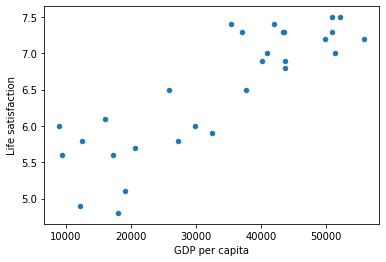

In [5]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [6]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Take a Quick Look at the Data Structure

Cada linha representa um distrito. Existem 10 atributos: longitude, latitude, idade_da_modificação, total_quartos, total_quartos, população, famílias, renda média, valor mediano da casa e proximidade do oceano.

O método `info()` é útil para obter uma descrição rápida dos dados, em particular o número total de linhas, o tipo de cada atributo e o número de valores não nulos.

In [8]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Existem **20.640** instâncias no conjunto de dados, o que significa que é bastante pequeno para os padrões do Machine Learning, mas é perfeito para começar. Observe que o atributo `total_bedrooms` possui apenas **20.433** valores não nulos, o que significa que 207 distritos estão sem esse recurso. Precisamos cuidar disso mais tarde.

Todos os atributos são numéricos, exceto o campo `ocean_proximity`. Seu tipo é objeto, portanto pode conter qualquer tipo de objeto Python. Mas como você carregou esses dados de um arquivo CSV, você sabe que deve ser um atributo de texto. Ao examinar as cinco principais linhas, você provavelmente notou que os valores na coluna `ocean_proximity` eram repetitivos, o que significa que provavelmente é um atributo categórico. Você pode descobrir quais categorias existem e quantos distritos pertencem a cada categoria usando o método `value_counts()`:

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# Vamos olhar para os outros campos. O método describe() mostra um resumo dos atributos numéricos.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


As linhas de contagem (count), média (mean), mínimo (min) e máximo (max) são auto-explicativas. 

Observe que os valores nulos são ignorados (por exemplo, a contagem de `total_bedrooms` é **20.433**, não **20.640**). A linha `std` mostra o desvio padrão, responsável pela medição da dispersão dos valores. As linhas de 25%, 50% e 75% mostram os percentis correspondentes: um percentil indica o valor abaixo do qual uma determinada porcentagem de observações em um grupo de observações outono. Por exemplo, 25% dos distritos têm uma habitação_median_age menor que 18, enquanto 50% são menores que 29 e 75% são menores que 37. Estes são freqüentemente chamados de percentil 25 (ou primeiro quartil), mediana e percentil 75 (ou terceiro quartil).

Outra maneira rápida de ter uma idéia do tipo de dados com os quais você está lidando é plotar um histograma para cada atributo numérico. Um histograma mostra o número de instâncias (no eixo vertical) que possuem um determinado intervalo de valores (no eixo horizontal). Você pode plotar esse atributo por vez ou chamar o método `hist()` em todo o conjunto de dados (conforme mostrado no exemplo de código a seguir), e ele plotará um histograma para cada atributo numérico:

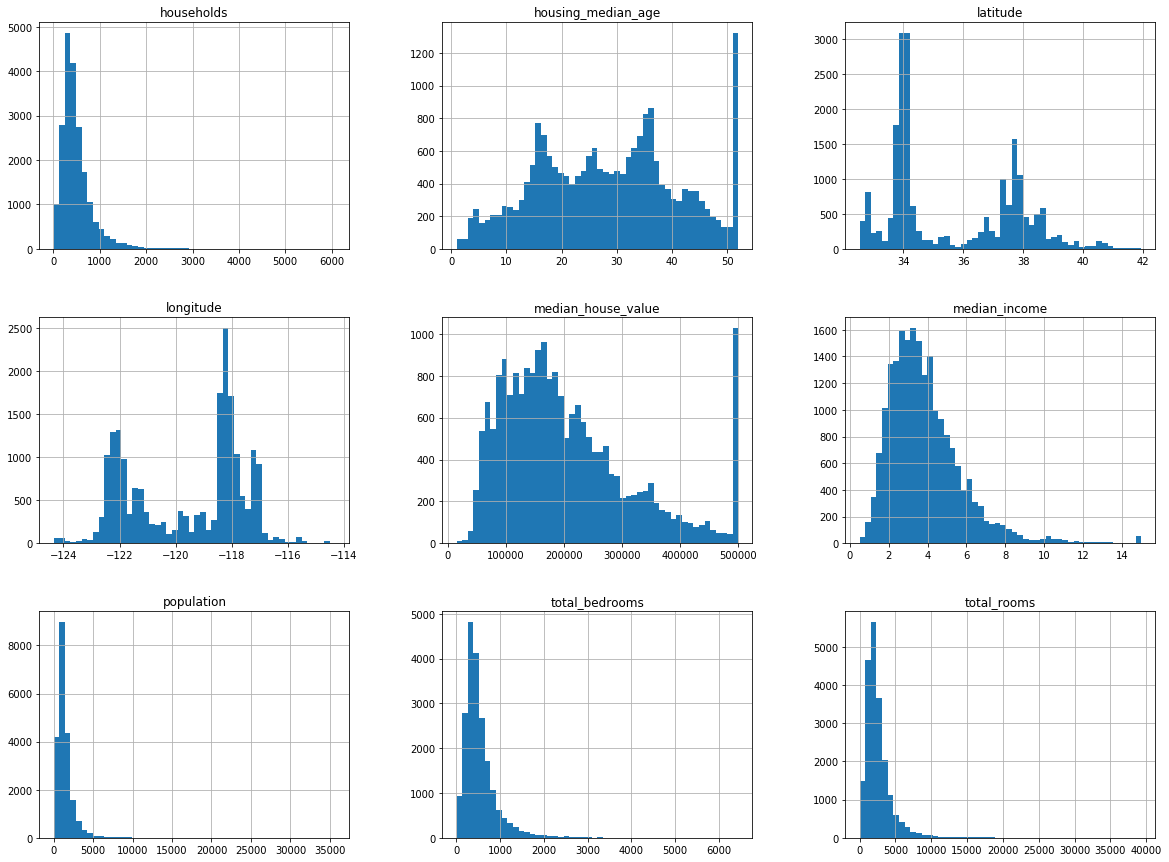

In [12]:
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

Há algumas coisas que você pode notar nestes histogramas:

1. Primeiro, o atributo de renda mediana não parece estar expresso em dólares americanos (USD). Após verificar com a equipe que coletou os dados, você será informado de que os dados foram redimensionados e limitados em 15 (na verdade, 15.0001) para rendas medianas mais altas e em 0,5 (na verdade, 0,4999) para rendas medianas mais baixas. Os números representam aproximadamente dezenas de milhares de dólares (por exemplo, 3 na verdade significa cerca de U\\$ 30.000). Trabalhar com atributos pré-processados é comum no Machine Learning e não é necessariamente um problema, mas você deve tentar entender como os dados foram calculados.
2. A idade média da moradia e o valor médio da moradia também foram limitados. O último pode ser um problema sério, pois é seu atributo de destino (seus marcadores). Seus algoritmos de aprendizado de máquina podem aprender que os preços nunca ultrapassam esse limite. Você precisa verificar com sua equipe de clientes (a equipe que usará a saída do seu sistema) para ver se isso é um problema ou não. Se eles disserem que precisam de previsões precisas, mesmo além de U\\$ 500.000, você terá duas opções:

    1. Colete etiquetas apropriadas para os distritos cujas etiquetas foram limitadas.
    2. Remova esses distritos do conjunto de treinamento (e também do conjunto de testes, pois seu sistema não deve ser mal avaliado se predizer valores acima de U\\$ 500.000)
    
3. Esses atributos têm escalas muito diferentes. Discutiremos isso mais adiante neste capítulo, quando explorarmos o dimensionamento de recursos.
4. Finalmente, muitos histogramas são pesados: se estendem muito mais à direita da mediana do que à esquerda. Isso pode tornar um pouco mais difícil para alguns algoritmos de Machine Learning detectar padrões. Vamos tentar transformar esses atributos posteriormente para ter mais distribuições em forma de sino.

Espero que agora você tenha uma melhor compreensão do tipo de dados com os quais está lidando.

---

## Create a Test Set

Pode parecer estranho deixar voluntariamente parte dos dados nesta fase. Afinal, você deu uma rápida olhada nos dados e certamente deve aprender muito mais sobre isso antes de decidir quais algoritmos usar, certo? Isso é verdade, mas seu cérebro é um sistema incrível de detecção de padrões, o que significa que é altamente propenso a sobreajuste: se você olhar para o conjunto de testes, poderá encontrar algum padrão aparentemente interessante nos dados de teste que o leva a selecionar um tipo particular de modelo de aprendizado de máquina. Ao estimar o erro de generalização usando o conjunto de testes, sua estimativa será otimista demais e você iniciará um sistema que não terá o desempenho esperado. Isso é chamado de viés de espionagem de dados.

Criar um conjunto de testes é teoricamente simples: escolha algumas instâncias aleatoriamente, geralmente **20%** do conjunto de dados (ou menos, se o conjunto de dados for muito grande) e deixe-as de lado:

Uma solução é salvar o conjunto de testes na primeira execução e carregá-lo nas execuções subsequentes. Outra opção é definir a semente do gerador de números aleatórios (como em nosso exemplo, `np.random.seed(42)`) antes de chamar `random.permutation()` para que ele sempre gere os mesmos índices embaralhados.

In [13]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [14]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

print(f'train: {len(train_set)}')
print(f'test: {len(test_set)}')

train: 16512
test: 4128


Mas essas duas soluções serão interrompidas na próxima vez que você buscar um conjunto de dados atualizado. Para ter uma divisão de teste / treinamento estável mesmo após a atualização do conjunto de dados, uma solução comum é usar o identificador de cada instância para decidir se deve ou não fazer parte do conjunto de testes (supondo que as instâncias tenham um identificador exclusivo e imutável). Por exemplo, você pode calcular um hash do identificador de cada instância e colocá-la no conjunto de testes se o hash for menor ou igual a 20% do valor máximo do hash. Isso garante que o conjunto de testes permaneça consistente em várias execuções, mesmo se você atualizar o conjunto de dados. O novo conjunto de testes conterá 20% das novas instâncias, mas não conterá nenhuma instância que estava anteriormente no conjunto de treinamento.

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

Infelizmente, o dataset não possui uma coluna de identificação única. A solução mais simples é usar o índice de linha como o ID:

In [18]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Se você usar o índice de linha como um identificador exclusivo, precisará garantir que novos dados sejam anexados ao final do conjunto de dados e que nenhuma linha seja excluída. Se isso não for possível, você pode tentar usar os recursos mais estáveis para criar um identificador exclusivo. Por exemplo, a latitude e a longitude de um distrito são garantidas por alguns milhões de anos, para que você possa combiná-las em um ID da seguinte forma:

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


O `Scikit-Learn` fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de várias maneiras. A função mais simples é `train_test_split()`, que faz praticamente a mesma coisa que a função `split_train_test()`, com alguns recursos adicionais. Primeiro, há um parâmetro `random_state` que permite definir a semente do gerador aleatório. Segundo, você pode transmitir vários conjuntos de dados com um número idêntico de linhas e os dividirá nos mesmos índices (isso é muito útil, por exemplo, se você tiver um DataFrame separado para rótulos):

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


Até agora, consideramos métodos de amostragem puramente aleatórios. Isso geralmente é bom se seu conjunto de dados for grande o suficiente (especialmente em relação ao número de atributos), mas se não for, você corre o risco de introduzir um viés de amostragem significativo. Quando uma empresa de pesquisa decide ligar para 1.000 pessoas para fazer algumas perguntas, elas não escolhem apenas 1.000 pessoas aleatoriamente em uma lista telefônica. Eles tentam garantir que essas mil pessoas sejam representativas de toda a população. Por exemplo, a população dos EUA é de 51,3% de mulheres e 48,7% de homens, portanto, uma pesquisa bem conduzida nos EUA tentaria manter essa proporção na amostra: 513 mulheres e 487 homens. Isso é chamado de amostragem estratificada: a população é dividida em subgrupos homogêneos chamados estratos, e o número certo de instâncias é amostrado de cada estrato para garantir que o conjunto de testes seja representativo da população geral. Se as pessoas que participaram da pesquisa usassem amostras puramente aleatórias, haveria uma chance de cerca de 12% de amostrar um conjunto de testes distorcido que era menos de 49% feminino ou mais de 54% feminino. De qualquer forma, os resultados da pesquisa seriam significativamente tendenciosos.

Suponha que você conversou com especialistas que lhe disseram que a renda mediana é um atributo muito importante para prever os preços medianos da moradia. Convém garantir que o conjunto de testes seja representativo das várias categorias de renda em todo o conjunto de dados. Como a renda mediana é um atributo numérico contínuo, você primeiro precisa criar um atributo de categoria de renda. Vamos olhar mais de perto o histograma da renda mediana: a maioria dos valores da renda mediana está agrupada em torno de 1,5 a 6 (ou seja, US **\\$15.000** a US **\\$60.000**), mas algumas rendas medianas vão muito além de 6. É importante ter um número suficiente de instâncias em seu conjunto de dados para cada estrato ou a estimativa da importância de um estrato pode ser enviesada. Isso significa que você não deve ter muitos estratos e cada estrato deve ser grande o suficiente. O código a seguir usa a função `pd.cut()` para criar um atributo de categoria de renda com cinco categorias (rotuladas de 1 a 5): a categoria 1 varia de 0 a 1,5 (ou seja, menos de US **\\$15.000**), a categoria 2 de 1,5 a 3, e assim por diante:

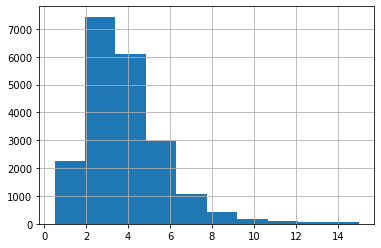

In [23]:
housing["median_income"].hist()
plt.show()

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

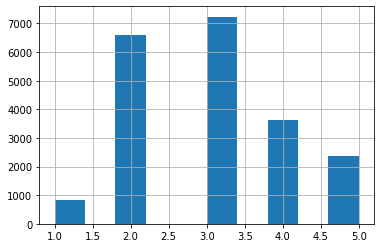

In [26]:
housing["income_cat"].hist()
plt.show()

Agora você está pronto para fazer uma amostragem estratificada com base na categoria de renda. Para isso, você pode usar a classe StratifiedShuffleSplit do Scikit-Learn:

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Vamos ver se funcionou como esperado. Você pode começar observando as proporções da categoria de renda no conjunto de testes:

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [29]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [30]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

Com um código semelhante, você pode medir as proporções da categoria de renda no conjunto de dados completo. A Figura 2-10 compara as proporções de categoria de renda no conjunto de dados geral, no conjunto de testes gerado com amostragem estratificada e em um conjunto de testes gerado usando amostragem puramente aleatória. Como você pode ver, o conjunto de testes gerado usando amostragem estratificada possui proporções de categoria de renda quase idênticas às do conjunto de dados completo, enquanto o conjunto de testes gerado usando amostragem puramente aleatória é inclinado.

In [31]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Agora você deve remover o atributo Income_cat para que os dados voltem ao seu estado original:

```python
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
```

Passamos bastante tempo na geração de conjuntos de testes por um bom motivo: essa é uma parte muitas vezes negligenciada, mas crítica, de um projeto de Machine Learning. Além disso, muitas dessas idéias serão úteis mais tarde quando discutirmos a validação cruzada. Agora é hora de avançar para a próxima etapa: explorar os dados.

## Discover and visualize the data to gain insights

Até agora, você deu uma rápida olhada nos dados para obter uma compreensão geral do tipo de dados que está manipulando. Agora, o objetivo é aprofundar um pouco mais.

Primeiro, certifique-se de deixar o teste de lado e de explorar apenas o conjunto de treinamento. Além disso, se o conjunto de treinamento for muito grande, convém experimentar um conjunto de exploração para facilitar e agilizar as manipulações. No nosso caso, o conjunto é bem pequeno, então você pode trabalhar diretamente no conjunto completo. Vamos criar uma cópia para que você possa brincar com ela sem prejudicar o conjunto de treinamento:

In [33]:
housing = strat_train_set.copy()

### Visualização de dados geográficos

Como há informações geográficas (latitude e longitude), é uma boa idéia criar um gráfico de dispersão de todos os distritos para visualizar os dados:

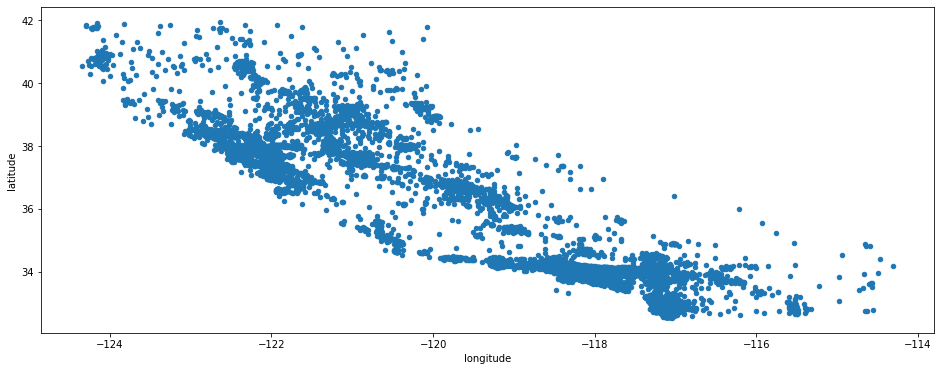

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(16,6))
plt.show()

Parece a Califórnia, mas, fora isso, é difícil ver algum padrão em particular. Definir a opção alfa como 0,1 facilita muito a visualização dos locais onde há uma alta densidade de pontos de dados:

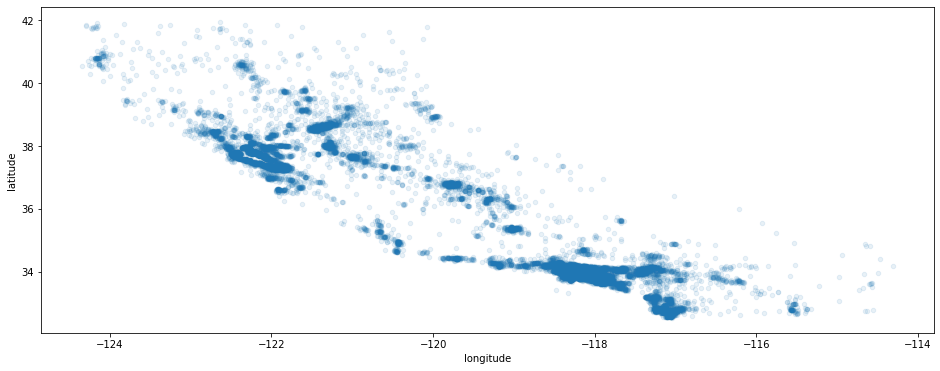

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(16,6))
plt.show()

Agora isso é muito melhor: você pode ver claramente as áreas de alta densidade, como a Bay Area e os arredores de Los Angeles e San Diego, além de uma longa linha de densidade bastante alta no Central Valley, especialmente em Sacramento e Fresno.

Nossos cérebros são muito bons em detectar padrões nas imagens, mas pode ser necessário brincar com os parâmetros de visualização para destacar os padrões.

Agora vamos ver os preços da habitação. O raio de cada círculo representa a população do distrito (opção) e a cor representa o preço (opção c). Usaremos um mapa de cores predefinido (opção cmap) chamado jet, que varia de azul (valores baixos) a vermelho (preços altos):

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

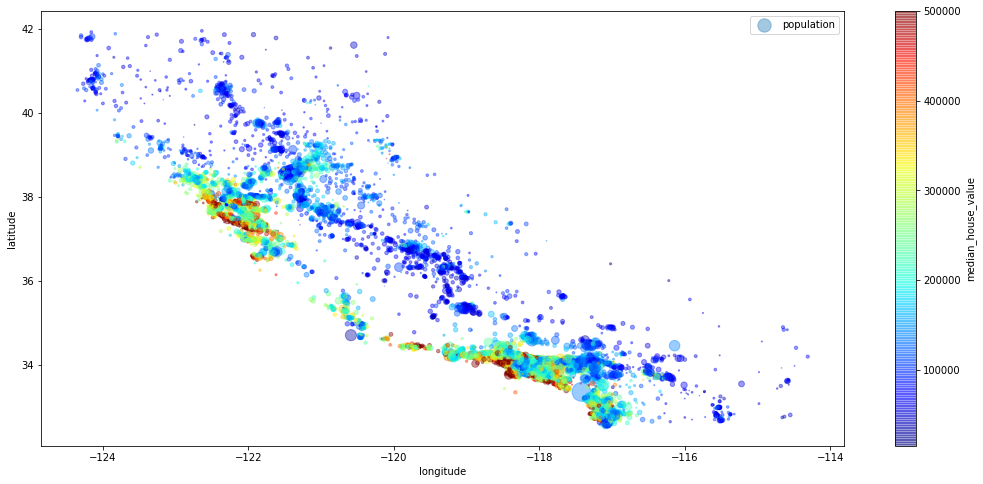

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(18,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()
plt.show()

Esta imagem informa que os preços da moradia estão muito relacionados à localização (por exemplo, perto do oceano) e à densidade populacional, como você provavelmente já sabia. Um algoritmo de cluster deve ser útil para detectar o cluster principal e adicionar novos recursos que medem a proximidade dos centros de cluster. O atributo de proximidade do oceano também pode ser útil, embora no norte da Califórnia os preços da habitação nos distritos costeiros não sejam muito altos, por isso não é uma regra simples.

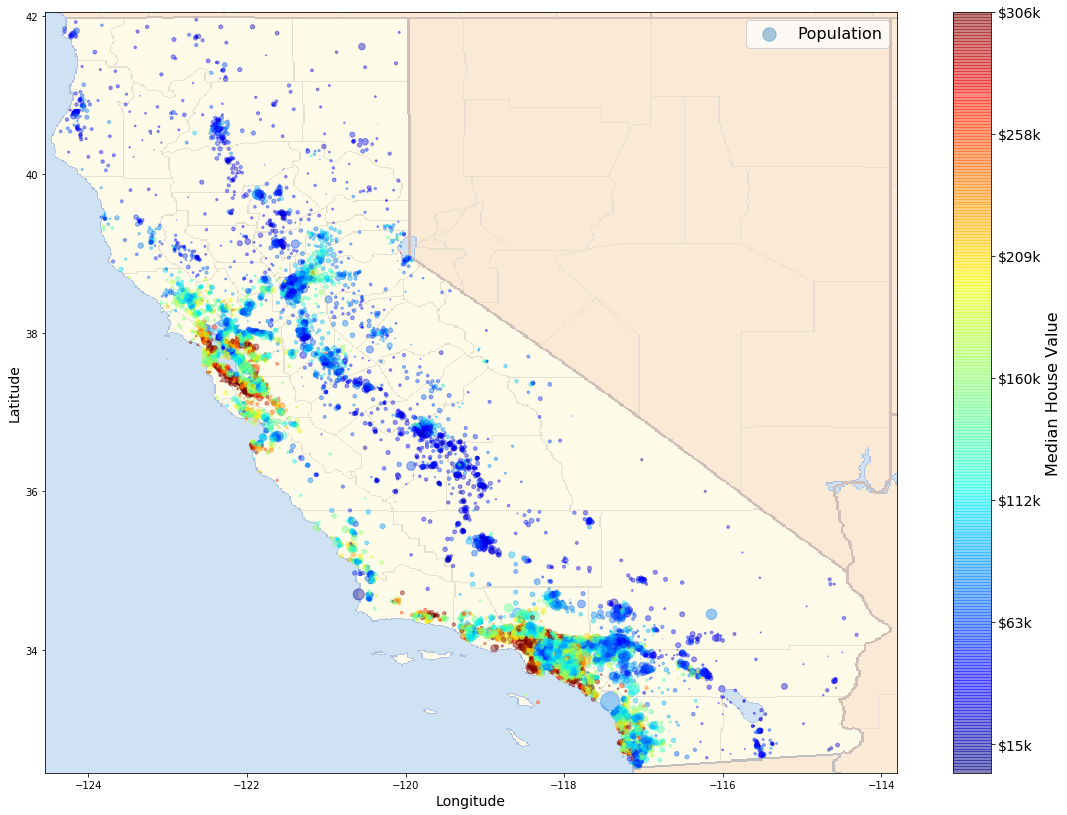

In [37]:
import matplotlib.image as mpimg

california_img=mpimg.imread('../data/california.png')

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

### Looking for Correlations

Como o conjunto de dados não é muito grande, você pode facilmente calcular o coeficiente de correlação padrão (também chamado de r de Pearson) entre cada par de atributos usando o método `corr()`:

In [38]:
corr_matrix = housing.corr()

In [39]:
# Now let’s look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

O coeficiente de correlação varia de –1 a 1. Quando está próximo de 1, significa que há uma forte correlação positiva; por exemplo, o valor médio da casa tende a aumentar quando a renda mediana aumenta. Quando o coeficiente é próximo de -1, significa que há uma forte correlação negativa; você pode ver uma pequena correlação negativa entre a latitude e o valor médio da casa (ou seja, os preços têm uma leve tendência a cair quando você vai para o norte). Finalmente, coeficientes próximos de 0 significam que não há correlação linear. A figura abaixo mostra várias plotagens junto com o coeficiente de correlação entre os eixos horizontal e vertical.

![03](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0214.png)

O coeficiente de correlação (correlation coefficient) mede apenas correlações lineares ("se x sobe, y geralmente sobe/desce"). Pode perder completamente relações não lineares (por exemplo, "se x estiver próximo de 0, y geralmente sobe"). Observe como todos os gráficos da linha inferior têm um coeficiente de correlação igual a 0, apesar de seus eixos claramente não serem independentes: estes são exemplos de relacionamentos não lineares. Além disso, a segunda linha mostra exemplos em que o coeficiente de correlação é igual a 1 ou –1; observe que isso não tem nada a ver com a inclinação. Por exemplo, sua altura em polegadas tem um coeficiente de correlação de 1 com sua altura em pés ou em nanômetros.

Outra maneira de verificar a correlação entre os atributos é usar a função pandas `scatter_matrix()`, que plota todos os atributos numéricos em relação a qualquer outro atributo numérico. Como agora existem 11 atributos numéricos, você obteria 112 = 121 parcelas, o que não caberia em uma página; portanto, vamos nos concentrar em alguns atributos promissores que parecem mais correlacionados com o valor médio da moradia:

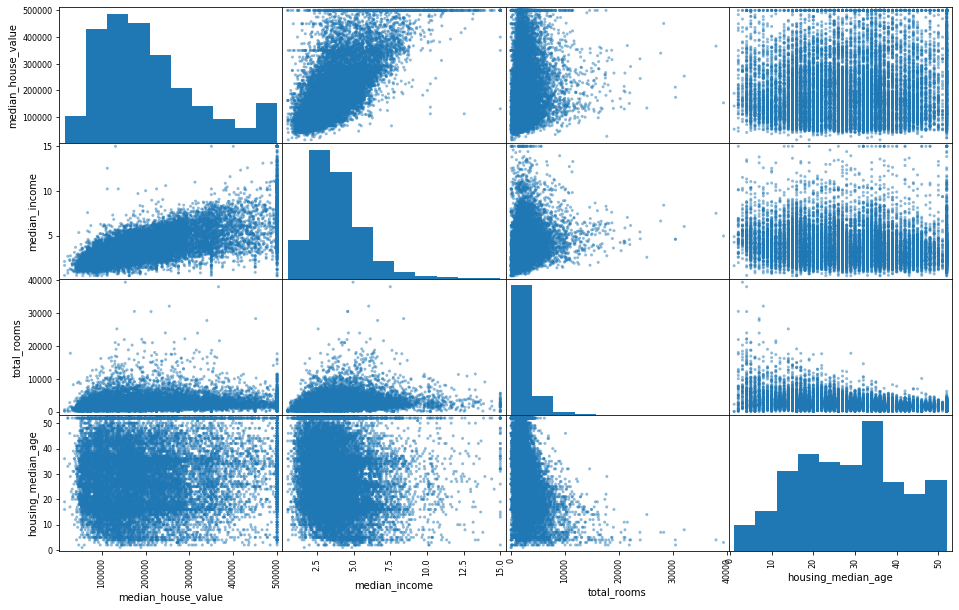

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(16, 10))
plt.show()
#save_fig("scatter_matrix_plot")

A diagonal principal (superior esquerda para baixo direita) estaria cheia de linhas retas se os pandas representassem cada variável contra si mesma, o que não seria muito útil. Portanto, o pandas exibe um histograma de cada atributo (outras opções estão disponíveis; consulte a documentação do pandas para obter mais detalhes).

O atributo mais promissor para prever o valor médio da casa é a renda mediana (median income); portanto, vamos dar um zoom no gráfico de dispersão de correlação:

[0, 16, 0, 550000]

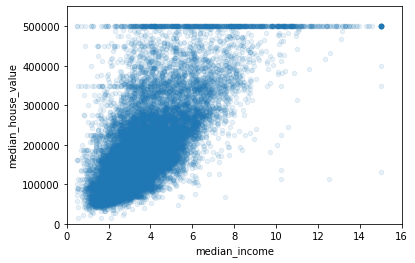

In [41]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#save_fig("income_vs_house_value_scatterplot")

Este enredo revela algumas coisas. Primeiro, a correlação é realmente muito forte; você pode ver claramente a tendência de alta e os pontos não estão muito dispersos. Segundo, o preço máximo que observamos anteriormente é claramente visível como uma linha horizontal de US \\$500.000. Mas esse enredo revela outras linhas retas menos óbvias: uma linha horizontal em torno de US $ 450.000, outra em torno de US \\$350.000, talvez uma em torno de US \\$280.000 e mais algumas abaixo disso. Você pode tentar remover os distritos correspondentes para impedir que seus algoritmos aprendam a reproduzir essas peculiaridades de dados.

### Experimentando combinações de atributos (Experimenting with Attribute Combinations)

Felizmente, as seções anteriores forneceram uma idéia de algumas maneiras pelas quais você pode explorar os dados e obter insights. Você identificou algumas peculiaridades de dados que talvez deseje limpar antes de alimentar os dados com um algoritmo de Machine Learning e encontrou correlações interessantes entre atributos, em particular com o atributo de destino. Você também notou que alguns atributos têm uma distribuição pesada, então você pode querer transformá-los (por exemplo, calculando o logaritmo). Obviamente, sua milhagem variará consideravelmente com cada projeto, mas as idéias gerais são semelhantes.

Uma última coisa que você pode querer fazer antes de preparar os dados para os algoritmos de Machine Learning é experimentar várias combinações de atributos. Por exemplo, o número total de quartos em um distrito não é muito útil se você não souber quantas casas existem. O que você realmente deseja é o número de quartos por família. Da mesma forma, o número total de quartos por si só não é muito útil: você provavelmente deseja compará-lo com o número de quartos. E a população por família também parece ser uma combinação interessante de atributos para se olhar. Vamos criar esses novos atributos:

In [42]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

#### E agora vamos ver a matriz de correlação novamente:

In [43]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Ei, nada mal! O novo atributo bedrooms_per_room está muito mais correlacionado com o valor mediano da casa do que o número total de quartos ou quartos. Aparentemente, as casas com uma relação quarto / quarto mais baixa tendem a ser mais caras. O número de quartos por família também é mais informativo do que o número total de quartos em um distrito - obviamente, quanto maiores as casas, mais caras elas são.

Essa rodada de exploração não precisa ser absolutamente completa; o objetivo é começar com o pé direito e obter rapidamente insights que ajudarão você a obter um primeiro protótipo razoavelmente bom. Mas este é um processo iterativo: depois de colocar um protótipo em funcionamento, você pode analisar sua saída para obter mais insights e voltar a esta etapa de exploração.

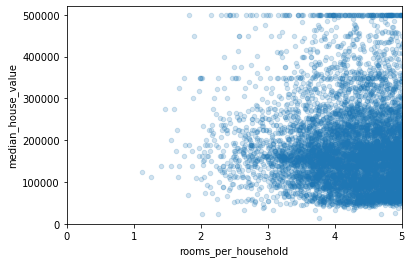

In [44]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [45]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the data for Machine Learning algorithms

É hora de preparar os dados para seus algoritmos de aprendizado de máquina. Em vez de fazer isso manualmente, você deve escrever funções para esse fim, por vários bons motivos:

* Isso permitirá que você reproduza essas transformações facilmente em qualquer conjunto de dados (por exemplo, na próxima vez em que você obtiver um novo conjunto de dados).
* Você criará gradualmente uma biblioteca de funções de transformação que poderá reutilizar em projetos futuros.
* Você pode usar essas funções em seu sistema ativo para transformar os novos dados antes de alimentá-los com seus algoritmos.
* Isso permitirá que você tente facilmente várias transformações e veja qual combinação de transformações funciona melhor.

Mas primeiro vamos rever para um conjunto de treinamento limpo (copiando `strat_train_set` mais uma vez). Também vamos separar os preditores e os rótulos, já que não queremos necessariamente aplicar as mesmas transformações aos preditores e aos valores alvo (observe que `drop()` cria uma cópia dos dados e não afeta `strat_train_set`):

In [46]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [47]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


## Limpeza de Dados (Data Cleaning)

A maioria dos algoritmos de Machine Learning não pode funcionar com os recursos ausentes, por isso vamos criar algumas funções para cuidar deles. Vimos anteriormente que o atributo `total_bedrooms` tem alguns valores ausentes, então vamos corrigir isso. Você tem três opções:

1. Livre-se dos distritos correspondentes.
2. Livre-se de todo o atributo.
3. Defina os valores para algum valor (zero, média, mediana etc.).

Você pode fazer isso facilmente usando os métodos `dropna()`, `drop()` e `fillna()` do DataFrame:

In [48]:
#sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [49]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [50]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


Se você escolher a opção 3, calcule o valor mediano no conjunto de treinamento e use-o para preencher os valores ausentes no conjunto de treinamento. Não se esqueça de salvar o valor mediano que você calculou. Você precisará mais tarde substituir os valores ausentes no conjunto de testes quando desejar avaliar seu sistema e também quando o sistema entrar em operação para substituir valores ausentes em novos dados.

O **Scikit-Learn** fornece uma classe útil para cuidar dos valores ausentes: `SimpleImputer`. Aqui está como usá-lo. Primeiro, você precisa criar uma instância `SimpleImputer`, especificando que deseja substituir os valores ausentes de cada atributo pela mediana desse atributo:

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Como a mediana só pode ser calculada em atributos numéricos, é necessário criar uma cópia dos dados sem o atributo de texto `ocean_proximity`:

In [52]:
# Remove the text attribute because median can only be calculated on numerical attributes:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

Agora você pode ajustar a instância do imputador aos dados de treinamento usando o método `fit()`:

In [53]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

O imputador simplesmente calculou a mediana de cada atributo e armazenou o resultado em sua variável de instância `statistics_`. Somente o atributo `total_bedrooms` tinha valores ausentes, mas não podemos ter certeza de que não haverá valores ausentes nos novos dados após a ativação do sistema, portanto, é mais seguro aplicar o imputador a todos os atributos numéricos:

In [54]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
# Check that this is the same as manually computing the median of each attribute:

housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Agora você pode usar esse imputador "treinado" para transformar o conjunto de treinamento substituindo os valores ausentes pelas medianas aprendidas:

In [56]:
# Transform the training set:

X = imputer.transform(housing_num)

O resultado é uma matriz NumPy simples que contém os recursos transformados. Se você deseja colocá-lo novamente em um DataFrame do pandas, é simples:

In [57]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [58]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [59]:
imputer.strategy

'median'

In [60]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [61]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Manipulação de texto e atributos categóricos (Handling Text and Categorical Attributes)

Até agora, lidamos apenas com atributos numéricos, mas agora vamos ver os atributos de texto (categorical input). Nesse conjunto de dados, há apenas um: o atributo `ocean_proximity`. Vamos analisar seu valor para as 10 primeiras instâncias:

In [62]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Não é um texto arbitrário: há um número limitado de valores possíveis, cada um dos quais representa uma categoria. Portanto, este atributo é um atributo categórico. A maioria dos algoritmos de aprendizado de máquina prefere trabalhar com números, portanto, vamos converter essas categorias de texto em números. Para isso, podemos usar a classe `OrdinalEncoder` do **Scikit-Learn**:

In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Você pode obter a lista de categorias usando a variável `categories_`. É uma lista que contém uma matriz 1D de categorias para cada atributo categórico (neste caso, uma lista que contém uma única matriz, pois existe apenas um atributo categórico):

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Um problema com essa representação é que os algoritmos ML assumem que dois valores próximos são mais semelhantes que dois valores distantes. Isso pode ser bom em alguns casos (por exemplo, para categorias ordenadas como "ruim", "média", "boa" e "excelente"), mas obviamente não é o caso da coluna ocean_proximity (por exemplo, categorias 0 e 4 são claramente mais semelhantes que as categorias 0 e 1). Para corrigir esse problema, uma solução comum é criar um atributo binário por categoria: um atributo igual a 1 quando a categoria for "<1H OCEAN" (e 0 caso contrário) e outro atributo igual a 1 quando a categoria for "INLAND" ( e 0 caso contrário) e assim por diante. Isso é chamado de codificação one-hot, porque apenas um atributo será igual a 1 (quente), enquanto os outros serão 0 (frio). Os novos atributos são chamados de atributos fictícios. O Scikit-Learn fornece uma classe OneHotEncoder para converter valores categóricos em vetores quentes (one-hot vectors):

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Observe que a saída é uma matriz esparsa SciPy, em vez de uma matriz NumPy. Isso é muito útil quando você possui atributos categóricos com milhares de categorias. Após a codificação one-hot, obtemos uma matriz com milhares de colunas e a matriz está cheia de 0s, exceto um 1 por linha. O uso de toneladas de memória principalmente para armazenar zeros seria muito inútil, portanto, em vez de uma matriz esparsa, apenas armazena a localização dos elementos diferentes de zero. Você pode usá-lo principalmente como uma matriz 2D normal, 21 mas se realmente deseja convertê-la em uma matriz NumPy (densa), basta chamar o método `toarray()`:

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [66]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [67]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Once again, you can get the list of categories using the encoder’s categories_ instance variable:

Mais uma vez, você pode obter a lista de categorias usando a variável categories_ instance:

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<div class="alert alert-info" role="alert">
    <h2 class="alert-heading">DICA</h2>    
    Se um atributo categórico tiver um grande número de categorias possíveis (por exemplo, código do país, profissão, espécie), a codificação one-hot resultará em um grande número de recursos de entrada. Isso pode diminuir o treinamento e prejudicar o desempenho. Se isso acontecer, convém substituir a entrada categórica por recursos numéricos úteis relacionados às categorias: por exemplo, você pode substituir o recurso <b>ocean_proximity</b> pela distância do oceano (da mesma forma, um código de país pode ser substituído pela população do país e PIB per capita). Como alternativa, você pode substituir cada categoria por um vetor de baixa dimensão e aprendível chamado incorporação. A representação de cada categoria seria aprendida durante o treinamento. Este é um exemplo de aprendizado de representação (consulte os Capítulos 13 e 17 para obter mais detalhes).
</div>

Let's create a custom transformer to add extra attributes:

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


Now let's build a pipeline for preprocessing the numerical attributes:

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [74]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [75]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [76]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [78]:
# Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [79]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [80]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [81]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and train a model 